## IMPORT

In [1]:
import pandas as pd

import numpy as np

%matplotlib inline 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PowerTransformer

from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.feature_selection import RFE

import warnings
from sklearn.exceptions import DataConversionWarning

from sklearn.linear_model import Lasso,Ridge,ElasticNet

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt


In [2]:
#concating 2 files to use test/train split

data = "https://raw.githubusercontent.com/HaniehRJP/Final-Project/main/customer_conversion_traing_dataset%20.csv"
df = pd.read_csv(data)
df_test_link='https://raw.githubusercontent.com/HaniehRJP/Final-Project/main/customer_conversion_testing_dataset.csv'
df_test=pd.read_csv(df_test_link)
df=pd.concat([df, df_test], axis=0)

In [3]:
df.head(10)

,LeadID,Age,Gender,Location,LeadSource,TimeSpent (minutes),PagesViewed,LeadStatus,EmailSent,DeviceType,ReferralSource,FormSubmissions,Downloads,CTR_ProductPage,ResponseTime (hours),FollowUpEmails,SocialMediaEngagement,PaymentHistory,Conversion (Target)
0,1,60,Female,Faisalabad,Referral,30,13,Warm,1,Desktop,Google,4,0,0.3,7,10,195,No Payment,0
1,2,27,Female,Islamabad,Referral,28,4,Hot,7,Desktop,Direct,2,2,0.3,13,3,103,No Payment,0
2,3,21,Female,Rawalpindi,Referral,45,10,Warm,9,Tablet,Direct,4,2,0.6,10,8,33,No Payment,0
3,4,37,Female,Faisalabad,Email,45,15,Warm,5,Desktop,ReferralSite,1,3,0.3,11,1,189,Good,0
4,5,35,Male,Karachi,Referral,31,11,Cold,2,Tablet,Google,4,3,0.5,9,2,83,No Payment,0
5,6,34,Male,Faisalabad,Referral,19,6,Hot,7,Desktop,Twitter,5,0,0.7,4,10,100,Good,0
6,7,28,Female,Rawalpindi,Email,42,15,Cold,0,Tablet,Direct,1,0,0.8,1,10,54,Good,0
7,8,26,Female,Gujranwala,Organic,45,11,Warm,1,Desktop,Direct,3,3,0.3,21,1,44,No Payment,0
8,9,54,Female,Islamabad,Social Media,12,3,Warm,6,Desktop,Google,3,0,0.6,5,6,49,Good,0
9,10,25,Male,Lahore,Referral,27,12,Hot,1,Desktop,Google,5,1,0.6,13,8,118,Good,0


## CLEANING

In [4]:
#NAs

def null_check(data_frame):
    print(f'Total null values per row: \n{data_frame.isnull().sum(axis=1)}\n')
    print(f'Total null values per column: \n{data_frame.isnull().sum()}\n')

null_check(df)

Total null values per row: 
0        0
1        0
2        0
3        0
4        0
        ..
26140    0
26141    0
26142    0
26143    0
26144    0
Length: 126145, dtype: int64

Total null values per column: 
LeadID                   0
Age                      0
Gender                   0
Location                 0
LeadSource               0
TimeSpent (minutes)      0
PagesViewed              0
LeadStatus               0
EmailSent                0
DeviceType               0
ReferralSource           0
FormSubmissions          0
Downloads                0
CTR_ProductPage          0
ResponseTime (hours)     0
FollowUpEmails           0
SocialMediaEngagement    0
PaymentHistory           0
Conversion (Target)      0
dtype: int64



In [5]:
#Duplicates check

def dup_check(data_frame):
    print(f'Duplicates found: {data_frame.duplicated().any()}\n')
    print(f'Number of duplicates: {data_frame.duplicated().sum()}\n')
    
dup_check(df)

Duplicates found: False

Number of duplicates: 0



In [6]:
#colmns optimization

#renaming
df.rename(columns={"TimeSpent (minutes)":"TimeSpent"}, inplace=True)
df.rename(columns={"Conversion (Target)":"Conversion"}, inplace=True)

#recalculating
df['ResponseTime'] = df['ResponseTime (hours)'] * 60

# Drop the original 'ResponseTime (hours)' column
df.drop(columns=['ResponseTime (hours)', 'Location', 'ReferralSource', 'LeadStatus', 'LeadID'], inplace=True)

## ENCODING

In [7]:
categoricals = df.select_dtypes(include=[object, bool])
categoricals.head(3)

,Gender,LeadSource,DeviceType,PaymentHistory
0,Female,Referral,Desktop,No Payment
1,Female,Referral,Desktop,No Payment
2,Female,Referral,Tablet,No Payment


In [8]:
numericals = df.select_dtypes(include = 'number')
numericals.head(3)

,Age,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,Conversion,ResponseTime
0,60,30,13,1,4,0,0.3,10,195,0,420
1,27,28,4,7,2,2,0.3,3,103,0,780
2,21,45,10,9,4,2,0.6,8,33,0,600


In [9]:
ordinals = categoricals[['PaymentHistory']]
ordinals.head(3)

,PaymentHistory
0,No Payment
1,No Payment
2,No Payment


In [10]:
ordinals = categoricals['PaymentHistory'].map({'Good':1, 'No Payment':0})

In [11]:
nominals = categoricals.drop(columns=['PaymentHistory'])

In [12]:
nominals.head(3)

,Gender,LeadSource,DeviceType
0,Female,Referral,Desktop
1,Female,Referral,Desktop
2,Female,Referral,Tablet


In [13]:
#making dunnies from nominals

nominals = pd.get_dummies(nominals, dtype=int)
nominals.head()

,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet
0,1,0,0,0,1,0,1,0,0
1,1,0,0,0,1,0,1,0,0
2,1,0,0,0,1,0,0,0,1
3,1,0,1,0,0,0,1,0,0
4,0,1,0,0,1,0,0,0,1


In [14]:
categoricals = pd.concat([ordinals, nominals], axis=1)
categoricals.head()

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet
0,0,1,0,0,0,1,0,1,0,0
1,0,1,0,0,0,1,0,1,0,0
2,0,1,0,0,0,1,0,0,0,1
3,1,1,0,1,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,1


In [15]:
df = pd.concat([categoricals, numericals], axis=1)

## TRAIN TEST SPLIT

In [16]:
#splitting into X and y
X=df.drop(columns=["Conversion"])
y=df[["Conversion"]]

In [17]:
#train and test split
X_train, X_test,y_train, y_test=train_test_split(X,y, random_state=42)

## DOWNSAMPLING

In [18]:
df_train=pd.concat([X_train, y_train], axis=1)
df_train

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,...,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,ResponseTime,Conversion
84409,1,0,1,1,0,0,0,0,0,1,...,50,11,7,3,1,0.5,10,83,1080,0
32618,0,0,1,1,0,0,0,1,0,0,...,9,15,9,5,1,0.8,8,103,1020,1
71754,0,1,0,0,0,1,0,0,1,0,...,24,2,7,0,2,0.6,10,78,780,0
51225,1,1,0,0,0,0,1,0,1,0,...,29,8,4,0,2,0.2,10,62,1020,0
54955,1,1,0,0,0,1,0,1,0,0,...,17,7,9,3,2,0.2,9,185,300,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19879,1,0,1,0,1,0,0,1,0,0,...,10,7,10,5,2,0.3,3,132,600,0
3694,1,1,0,0,0,0,1,0,1,0,...,8,12,10,1,3,0.8,8,25,600,0
860,1,0,1,0,1,0,0,0,0,1,...,33,11,7,2,3,0.2,10,78,600,0
15795,0,1,0,1,0,0,0,1,0,0,...,8,11,5,4,2,0.2,5,42,1020,0


In [19]:
#downsampling
category_0 = df_train[df_train['Conversion'] == 0] # negative class (majority)
category_1 = df_train[df_train['Conversion'] == 1] # positive class (minority)

print(category_0['Conversion'].value_counts())
print(category_1['Conversion'].value_counts())

Conversion
0    93055
Name: count, dtype: int64
Conversion
1    1553
Name: count, dtype: int64


In [20]:
c1_len=5000
category_0_down = category_0.sample(c1_len)
print(category_0_down.shape)
print(category_1.shape)

(5000, 21)
(1553, 21)


In [21]:
# reassemble the data
df_train = pd.concat([category_0_down, category_1], axis=0)
# shuffle the data
df_train = df_train.sample(frac=1) # frac specifies ratio of the shuffled output to the input size. for frac=1 the number of rows is unchanged
df_train['Conversion'].value_counts()

Conversion
0    5000
1    1553
Name: count, dtype: int64

In [22]:
df_train

,PaymentHistory,Gender_Female,Gender_Male,LeadSource_Email,LeadSource_Organic,LeadSource_Referral,LeadSource_Social Media,DeviceType_Desktop,DeviceType_Mobile,DeviceType_Tablet,...,TimeSpent,PagesViewed,EmailSent,FormSubmissions,Downloads,CTR_ProductPage,FollowUpEmails,SocialMediaEngagement,ResponseTime,Conversion
20805,1,0,1,1,0,0,0,0,0,1,...,54,3,10,5,2,0.1,5,60,1440,0
87173,0,0,1,0,1,0,0,1,0,0,...,60,11,0,2,3,0.3,8,196,240,0
65117,0,0,1,1,0,0,0,1,0,0,...,51,10,2,5,1,0.4,5,115,1440,0
79018,1,1,0,0,0,1,0,0,1,0,...,13,8,5,1,1,0.2,0,66,240,0
69249,0,0,1,0,1,0,0,0,1,0,...,34,4,6,1,1,0.7,10,31,480,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56410,0,0,1,0,1,0,0,0,1,0,...,58,11,9,1,3,0.6,2,102,180,1
6516,1,0,1,0,0,1,0,0,0,1,...,49,14,2,0,2,0.7,10,89,600,1
96940,1,1,0,0,0,1,0,1,0,0,...,25,15,8,4,2,0.2,8,147,1380,0
53566,0,0,1,1,0,0,0,0,1,0,...,56,8,6,5,0,0.6,4,71,60,0


In [23]:
X_train=df_train.drop(columns=["Conversion"])
y_train=df_train[["Conversion"]]

## UPSAMPLE USING SMOTE

In [24]:
# Upsampling using SMOTE
smote = SMOTE()

In [25]:
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
y_train_sm.value_counts()

Conversion
0             5000
1             5000
Name: count, dtype: int64

## SCALING

In [26]:
#scaling
pt=PowerTransformer()
pt.fit(X_train)
X_train_pt=pt.transform(X_train_sm)
X_test_pt=pt.transform(X_test)

PowerTransformer()

## LOGISTICS REGRESSION

In [27]:
#fitting LOGISTICS REGRESSION

log_model = LogisticRegression() # weights to be added if we want to avoid fall negative or fall positive
log_model.fit(X_train_pt, y_train_sm)

# predicting data
y_pred_train = log_model.predict(X_train_pt)
y_pred_test = log_model.predict(X_test_pt)


#results
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train),
                                         precision_score(y_train_sm, y_pred_train),
                                         recall_score(y_train_sm, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_log)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

,Error_metric,Train,Test
0,Accuracy,0.883000,0.894188
1,Precision,0.889544,0.094788
2,Recall,0.874600,0.652860


## TRAIN SET CONFUSION MATRIX

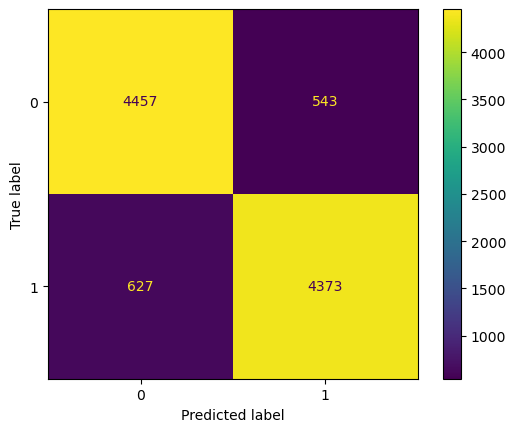

In [28]:
cm_train = confusion_matrix(y_train_sm, y_pred_train, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

## TEST SET CONFUSION MATRIX

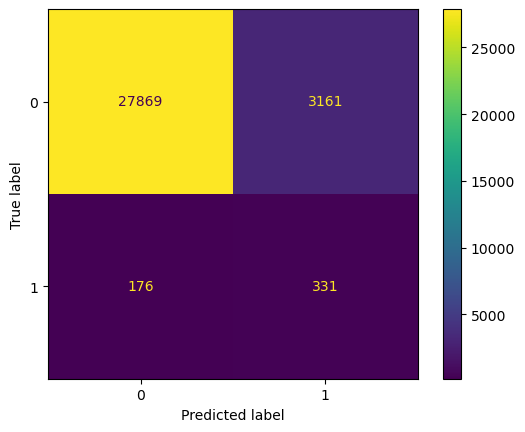

In [29]:
cm_train = confusion_matrix(y_test, y_pred_test, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

## Feature selection

In [30]:
# Filtering out DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

accuracy = {}  # Dictionary to store best accuracies
precision = {} # Dictionary to store best precision
recall={} # Dictionary to store best recalls

# Iterating over different numbers of selected features
for num_features in range(10, 21):  # Considering up to 10 features
    
    selector = RFE(log_model, n_features_to_select=num_features, step=1, verbose=1)
    selector.fit(X_train_pt, y_train_sm)
    
    weights = {0: 1, 1: 5}
    log_model = LogisticRegression(class_weight=weights)
    
    # Transforming the data
    X_train_RFE = selector.transform(X_train_pt)
    X_test_RFE = selector.transform(X_test_pt)
    
    # Fitting the model
    log_model.fit(X_train_RFE, y_train_sm)
    
    # Predicting and calculating R2 score
    y_pred_test= log_model.predict(X_test_RFE)
    acc=accuracy_score(y_test, y_pred_test)
    rec=recall_score(y_test, y_pred_test)
    prec=precision_score(y_test, y_pred_test)
    
    # Storing the best R2 score for each number of selected features
    accuracy[num_features] = acc
    precision[num_features]=prec
    recall[num_features]=rec

# Printing the best R2 score for each number of selected features
for num_features, acc in accuracy.items():
    prec = precision[num_features]
    rec = recall[num_features]
    print(f"Number of Features: {num_features}, Accuracy: {acc}, Precision: {prec}, Recall: {rec}")

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.


RFE(estimator=LogisticRegression(), n_features_to_select=10, verbose=1)

LogisticRegression(class_weight={0: 1, 1: 5})

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.


RFE(estimator=LogisticRegression(class_weight={0: 1, 1: 5}),
    n_features_to_select=11, verbose=1)

LogisticRegression(class_weight={0: 1, 1: 5})

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.


RFE(estimator=LogisticRegression(class_weight={0: 1, 1: 5}),
    n_features_to_select=12, verbose=1)

LogisticRegression(class_weight={0: 1, 1: 5})

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.


RFE(estimator=LogisticRegression(class_weight={0: 1, 1: 5}),
    n_features_to_select=13, verbose=1)

LogisticRegression(class_weight={0: 1, 1: 5})

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.


RFE(estimator=LogisticRegression(class_weight={0: 1, 1: 5}),
    n_features_to_select=14, verbose=1)

LogisticRegression(class_weight={0: 1, 1: 5})

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.


RFE(estimator=LogisticRegression(class_weight={0: 1, 1: 5}),
    n_features_to_select=15, verbose=1)

LogisticRegression(class_weight={0: 1, 1: 5})

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.


RFE(estimator=LogisticRegression(class_weight={0: 1, 1: 5}),
    n_features_to_select=16, verbose=1)

LogisticRegression(class_weight={0: 1, 1: 5})

Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.


RFE(estimator=LogisticRegression(class_weight={0: 1, 1: 5}),
    n_features_to_select=17, verbose=1)

LogisticRegression(class_weight={0: 1, 1: 5})

Fitting estimator with 20 features.
Fitting estimator with 19 features.


RFE(estimator=LogisticRegression(class_weight={0: 1, 1: 5}),
    n_features_to_select=18, verbose=1)

LogisticRegression(class_weight={0: 1, 1: 5})

Fitting estimator with 20 features.


RFE(estimator=LogisticRegression(class_weight={0: 1, 1: 5}),
    n_features_to_select=19, verbose=1)

LogisticRegression(class_weight={0: 1, 1: 5})

RFE(estimator=LogisticRegression(class_weight={0: 1, 1: 5}),
    n_features_to_select=20, verbose=1)

LogisticRegression(class_weight={0: 1, 1: 5})

Number of Features: 10, Accuracy: 0.7268288042616609, Precision: 0.05015534842432313, Recall: 0.8915187376725838
Number of Features: 11, Accuracy: 0.7193772394330469, Precision: 0.051981527225861884, Recall: 0.9546351084812623
Number of Features: 12, Accuracy: 0.732568094619019, Precision: 0.05561161565197892, Recall: 0.9783037475345168
Number of Features: 13, Accuracy: 0.7459809113105241, Precision: 0.05639631118467723, Recall: 0.9408284023668639
Number of Features: 14, Accuracy: 0.7503250150616736, Precision: 0.05764380929506425, Recall: 0.9467455621301775
Number of Features: 15, Accuracy: 0.7511494435107968, Precision: 0.057611184765577916, Recall: 0.9428007889546351
Number of Features: 16, Accuracy: 0.7511494435107968, Precision: 0.05771779732497891, Recall: 0.9447731755424064
Number of Features: 17, Accuracy: 0.7512128610838064, Precision: 0.0577317102567193, Recall: 0.9447731755424064
Number of Features: 18, Accuracy: 0.7510543171512826, Precision: 0.05769694049626596, Recall: 0.

### best decision according to RFE is keeping all 20 features
##### Accuracy: 0.750642102926721, Precision: 0.05739381542533991, Recall: 0.9408284023668639

## LASSO, RIDGE, ELASTICNET

- LASSO

In [31]:

# Initializing Logistic Regression model with Lasso regularization
log_model_lasso = LogisticRegression(penalty='l1', solver='liblinear', class_weight=weights)

# Fitting the model to your data
log_model_lasso.fit(X_train_pt, y_train_sm)

# Predicting on the test set
y_pred = log_model_lasso.predict(X_test_pt)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

LogisticRegression(class_weight={0: 1, 1: 5}, penalty='l1', solver='liblinear')

Accuracy: 0.7512128610838064
Precision: 0.0577317102567193
Recall: 0.9447731755424064


- RIDGE

In [32]:

# Initializing Logistic Regression model with Lasso regularization
log_model_lasso = LogisticRegression(penalty='l2', solver='liblinear', class_weight=weights)

# Fitting the model to your data
log_model_lasso.fit(X_train_pt, y_train_sm)

# Predicting on the test set
y_pred = log_model_lasso.predict(X_test_pt)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

LogisticRegression(class_weight={0: 1, 1: 5}, solver='liblinear')

Accuracy: 0.7508006468592447
Precision: 0.057641395908543926
Recall: 0.9447731755424064


- ELASTICNET

In [33]:

# Initializing Logistic Regression model with Lasso regularization
log_model_lasso = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.5, class_weight=weights)

# Fitting the model to your data
log_model_lasso.fit(X_train_pt, y_train_sm)

# Predicting on the test set
y_pred = log_model_lasso.predict(X_test_pt)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Printing evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

LogisticRegression(class_weight={0: 1, 1: 5}, l1_ratio=0.5,
                   penalty='elasticnet', solver='saga')

Accuracy: 0.7511494435107968
Precision: 0.05771779732497891
Recall: 0.9447731755424064


## Fit a KNN Classifier model 

In [34]:
# Instantiating KNN Classifier model

model = KNeighborsClassifier()

### Optimizing the Weighting Scheme for K-Nearest Neighbors (KNN)

In [35]:
# Defining a custom weight function

def custom_weight_function(distances):
    
    #Giving more weight to class 1
    
    weights = np.where(distances == 0, 5, 0.5)
    return weights

### Implementing Grid Searching for Number of Neighbors Optimization in KNN

In [36]:
# Defining the parameter grid for grid search and get the best model and fit the model

param_grid = {
    'n_neighbors': list(range(2, 21)),  # Range from 2 to 20
    'weights': [custom_weight_function, 'uniform', 'distance']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='recall')

# Fit the model
grid_search.fit(X_train_pt, y_train_sm)  # Assuming X_train and y_sm are your training data

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Now, best_model is the KNeighborsClassifier with the best hyperparameters
# You can use it for predictions on the test set
y_pred = best_model.predict(X_test)  # Assuming X_test is your test data


# Fit the model
model.fit(X_train_pt, y_train_sm)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20],
                         'weights': [<function custom_weight_function at 0x1a0f1d1c0>,
                                     'uniform', 'distance']},
             scoring='recall')

Best parameters: {'n_neighbors': 20, 'weights': 'distance'}


/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


KNeighborsClassifier()

In [37]:
# Instantiate KNN Classifier model
model = KNeighborsClassifier(n_neighbors=19,weights='distance')

# Fit the model
model.fit(X_train_pt, y_train_sm)


KNeighborsClassifier(n_neighbors=19, weights='distance')

### Predicting on the test and train set

In [38]:

y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train_pt) # predict train (for sanity checks)

# Evaluate performance
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train),
                                         precision_score(y_train_sm, y_pred_train),
                                         recall_score(y_train_sm, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_log)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,Error_metric,Train,Test
0,Accuracy,1.0,0.750927
1,Precision,1.0,0.057669
2,Recall,1.0,0.944773


### TRAIN SET CONFUSION MATRIX

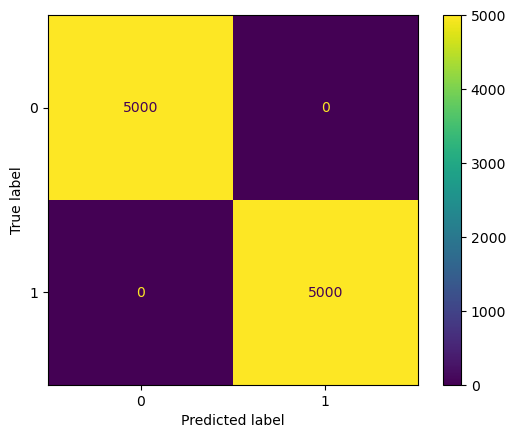

In [39]:
cm = confusion_matrix(y_train_sm, y_pred_train, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

### TEST SET CONFUSION MATRIX

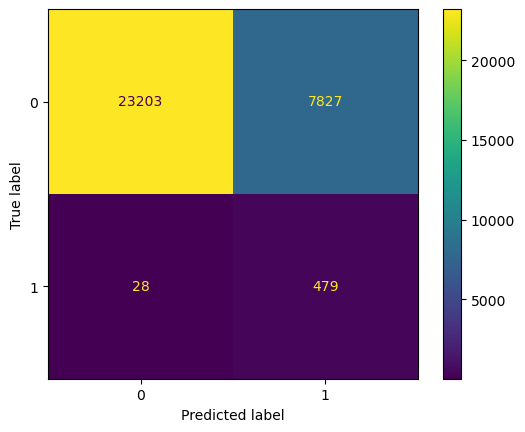

In [40]:
cm = confusion_matrix(y_test, y_pred_test, labels = model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## RandomForest Model

In [49]:
# for reproducible shuffling
RAND_STATE = 42

# test/train
TT_RATIO = 0.25 

In [50]:

rfc_ops = {"max_depth":6,
           "min_samples_leaf":20,
           "n_estimators":100,
           "bootstrap":True,
           "oob_score":True,
           "random_state":RAND_STATE}

clf = RandomForestClassifier(**rfc_ops)

clf.fit(X_train_sm, y_train_sm)
print("train prediction accuracy score: %.2f" %(clf.score(X_train_sm, y_train_sm)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))

RandomForestClassifier(max_depth=6, min_samples_leaf=20, oob_score=True,
                       random_state=42)

train prediction accuracy score: 0.93
test prediction accuracy score: 0.86


In [51]:
# Utilizing Out-of-Bag Score for Performance Evaluation in RandomForestClassifier
clf.oob_score_

0.9251

In [52]:
#calculating the accuracy score of the model on the test set
score_ds = accuracy_score(y_test,clf.predict(X_test))
score_ds

0.8645717728382535

### Investigating Hyperparameter Tuning with Grid Search and Evaluating Results

In [53]:
# Creating the GridSearchCV object
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': list(range(2, 12)), 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)

# Fitting the model
grid_search.fit(X_train_sm,y_train_sm)  # Assuming X_train and y_sm are your training data

# Printing the best parameters
print("Best parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# predicting on the test set
y_pred = best_model.predict(X_test)  # Assuming X_test is your test data


# Fit the model
clf.fit(X_train_sm, y_train_sm)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=6, min_samples_leaf=20,
                                              oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

Best parameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestClassifier(max_depth=6, min_samples_leaf=20, oob_score=True,
                       random_state=42)

### Fitting a RandomForest Classifier with Optimized Max Depth

In [54]:
rfc_ops = {"max_depth":9,
           "min_samples_leaf":1,
           'min_samples_split': 2,
           "n_estimators":100,
           "oob_score":True,
           "random_state":42}

clf = RandomForestClassifier(**rfc_ops)

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(X_train_sm, y_train_sm)
print("train prediction accuracy score: %.2f" %(clf.score(X_train_sm, y_train_sm)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))


RandomForestClassifier(max_depth=9, oob_score=True, random_state=42)

train prediction accuracy score: 0.95
test prediction accuracy score: 0.90


### Predicting on the test and train set

In [55]:
# Predictions on the test set


y_pred = clf.predict(X_test) # predict test
y_pred_train=clf.predict(X_train_sm) # predict train (for sanity checks)

# Evaluate performance
performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_sm, y_pred_train),
                                         precision_score(y_train_sm, y_pred_train),
                                         recall_score(y_train_sm, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.952000,0.903510
1,Precision,0.912409,0.141605
2,Recall,1.000000,0.988166


### Visualizing Accuracy and Recall Performance Based on Max Depth

RandomForestClassifier(max_depth=1, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=2, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=3, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=4, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=5, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=6, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=7, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=8, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=9, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=10, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=11, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=12, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=13, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=14, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=15, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=16, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=17, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=18, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=19, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


RandomForestClassifier(max_depth=20, oob_score=True, random_state=42)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


<Figure size 1500x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Random Forest Classifier Performance vs. Max Depth (Accuracy)')

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Accuracy')

<Axes: >

Text(0.5, 1.0, 'Random Forest Classifier Performance vs. Max Depth (Recall)')

Text(0.5, 0, 'Max Depth')

Text(0, 0.5, 'Recall')

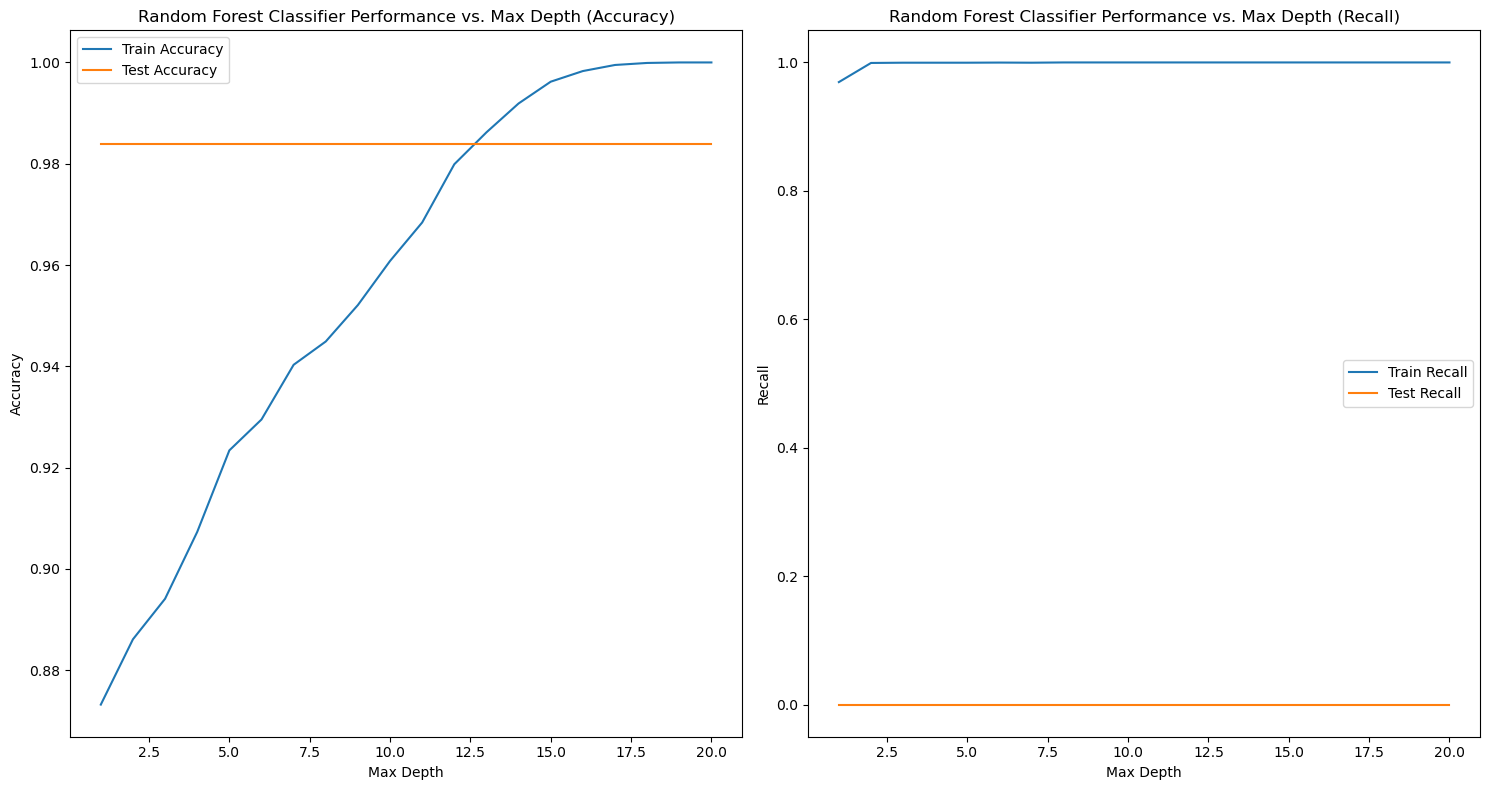

In [56]:
# Defining a range of values for max_depth
max_depth_values = list(range(1, 21))  # Adjust the range as needed

# Initializing empty lists to store accuracy and recall scores
train_accuracy_scores = []
test_accuracy_scores = []
train_recall_scores = []
test_recall_scores = []

# Iterating over different values of max_depth
for max_depth in max_depth_values:
    rfc_ops["max_depth"] = max_depth
    clf = RandomForestClassifier(**rfc_ops)
    clf.fit(X_train_pt, y_train_sm)
    
    # Calculating accuracy scores
    train_accuracy = accuracy_score(y_train_sm, clf.predict(X_train_pt))
    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    
    # Calculating recall scores
    train_recall = recall_score(y_train_sm, clf.predict(X_train_pt))
    test_recall = recall_score(y_test, clf.predict(X_test))
    
    # Appending scores to lists
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)
    train_recall_scores.append(train_recall)
    test_recall_scores.append(test_recall)

# Plotting the results
plt.figure(figsize=(15, 8))

# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(max_depth_values, train_accuracy_scores, label='Train Accuracy')
plt.plot(max_depth_values, test_accuracy_scores, label='Test Accuracy')
plt.title('Random Forest Classifier Performance vs. Max Depth (Accuracy)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Recall
plt.subplot(1, 2, 2)
plt.plot(max_depth_values, train_recall_scores, label='Train Recall')
plt.plot(max_depth_values, test_recall_scores, label='Test Recall')
plt.title('Random Forest Classifier Performance vs. Max Depth (Recall)')
plt.xlabel('Max Depth')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()
